In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [7]:
#Read the data from csv file
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#### Understand the data 
Cars milege:
HP:Horse power of engine(x1 column),MPG:Milege(miles pergallon)(y column),Vol:Volume(x2 column),WT:Weight(x3 column),SP:TOP speed of the car(x4 column)

In [4]:
#Rearrange the columns
cars=pd.DataFrame(cars,columns=['HP','VOL','SP','WT','MPG'])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Assumption in Multilinear Regression
##### 1.Linearity:The relationship btw the predictors(X) and the response(Y) is linear.
##### 2.Independence:Observations are independent of each other.
##### 3.Homoscedasticity:The residuals(Y-Y_hat)exhibit constant variance at all levels of the predictor.
##### 4.Normal Distirbution of Errors:The residuals of the model are normally distributed.
##### 5.No Multicollinearity:The independent variables should not be too highly correlated with each other.
#### Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable predictions.

#### EDA

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [17]:
#Check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

#### Observations
- There are no missing values
- There are 81 observations(81 different cars data)
- The data types of the columns are also relevant and valid

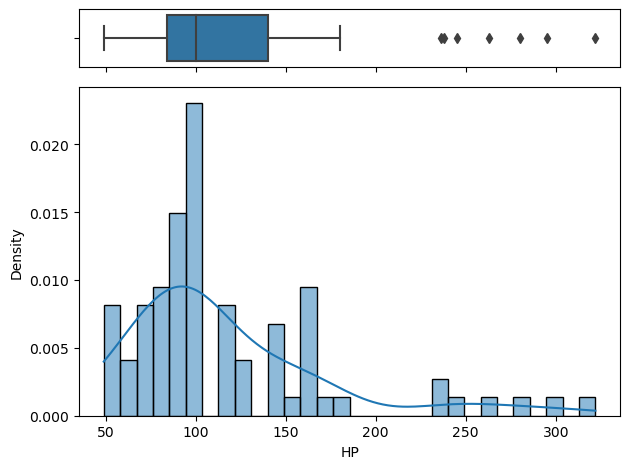

In [26]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
#Creating a boxplot
sns.boxplot(data=cars,x="HP",ax=ax_box,orient='h')
ax_box.set(xlabel='')#Remove x label for the boxplot

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x="HP" , ax=ax_hist , bins=30 , kde=True, stat="density")
ax_hist.set(ylabel="Density")

#Adjust Layout
plt.tight_layout()
plt.show()

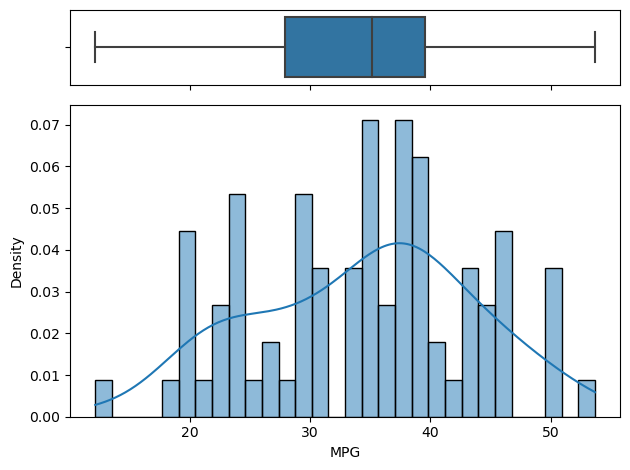

In [28]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.18,.75)})
#Creating a boxplot
sns.boxplot(data=cars,x="MPG",ax=ax_box,orient='m')
ax_box.set(xlabel='')#Remove x label for the boxplot

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x="MPG" , ax=ax_hist , bins=30 , kde=True, stat="density")
ax_hist.set(ylabel="Density")

#Adjust Layout
plt.tight_layout()
plt.show()

C:\Users\chala\anaconda\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


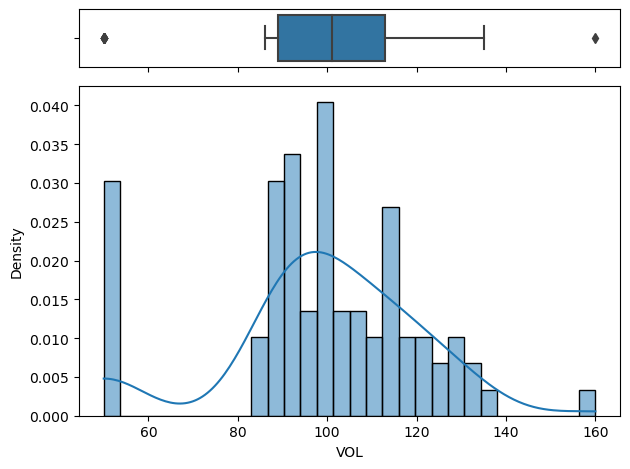

In [30]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.14,.80)})
#Creating a boxplot
sns.boxplot(data=cars,x="VOL",ax=ax_box,orient='v')
ax_box.set(xlabel='')#Remove x label for the boxplot

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x="VOL" , ax=ax_hist , bins=30 , kde=True, stat="density")
ax_hist.set(ylabel="Density")

#Adjust Layout
plt.tight_layout()
plt.show()

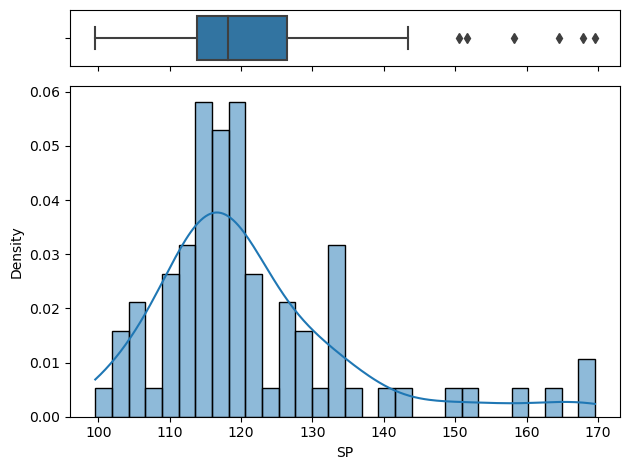

In [32]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.16,.95)})
#Creating a boxplot
sns.boxplot(data=cars,x="SP",ax=ax_box,orient='s')
ax_box.set(xlabel='')#Remove x label for the boxplot

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x="SP" , ax=ax_hist , bins=30 , kde=True, stat="density")
ax_hist.set(ylabel="Density")

#Adjust Layout
plt.tight_layout()
plt.show()

### Observations from boxplot and histograms
- There are some extreme values (outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns,a few outliers are observed in both tails for the distributions.
- the extreme values of cars data may have come from the specially designed nature of cars.
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

##### Checking for duplicated rows


In [42]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


##### Pair plots and Correlation Coefficients


C:\Users\chala\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


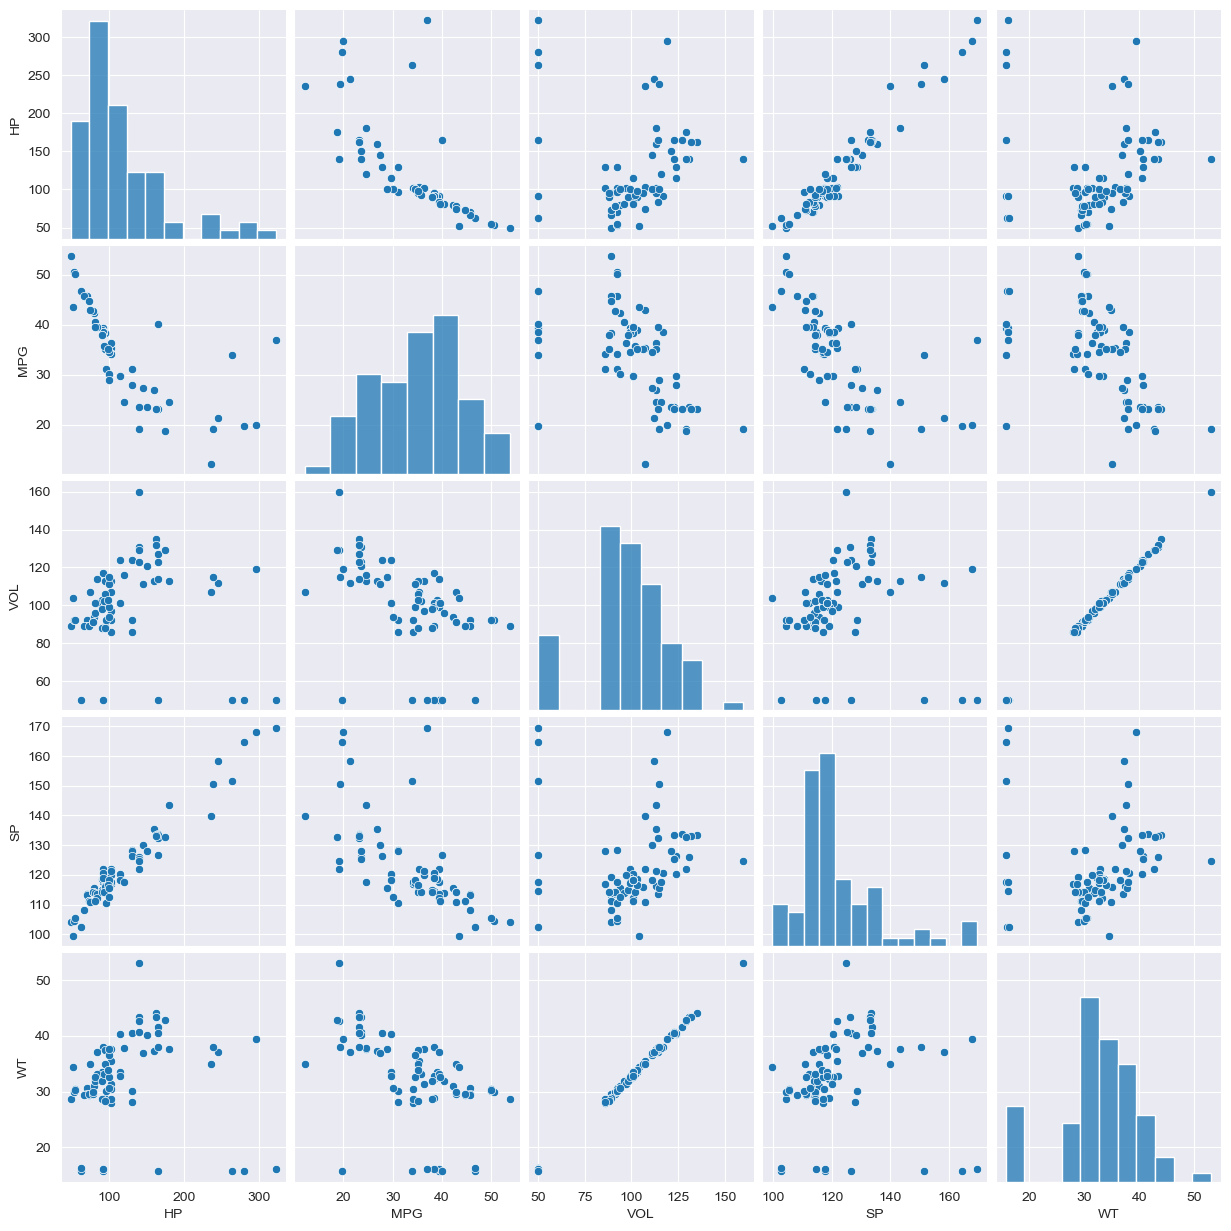

In [39]:
#Pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [46]:
#Checking for correlation
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
##### Observations
- There are only tails are displayed in the duplicated rows
- 